# Setting up the environment


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

# Import the required libraries
import matplotlib.pyplot as plt

# Load the dataset
bundesliga_df = pd.read_csv('Bundesliga1.csv')

# Display the first few rows of the dataset
bundesliga_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HF,AF,HC,AC,HY,AY,HR,AR
0,06/08/04,Werder Bremen,Schalke 04,1,0,H,0,0,D,9,8,22,19,5,2,0,1,0,0
1,07/08/04,Dortmund,Wolfsburg,1,2,A,1,1,D,24,9,9,20,7,3,0,3,0,0
2,07/08/04,Freiburg,Hansa Rostock,0,0,D,0,0,D,13,7,16,24,5,5,1,2,0,0
3,07/08/04,Hamburg,Bayern Munich,0,2,A,0,1,A,13,12,18,24,5,3,3,1,0,0
4,07/08/04,Hertha,Bochum,2,2,D,2,0,H,21,12,18,14,2,1,1,2,0,0


**Date**: The date of the match.

**HomeTeam**: The name of the home team.

**AwayTeam**: The name of the away team.

**FTHG**: The number of goals scored by the home team in full time.

**FTAG**: The number of goals scored by the away team in full time.

**FTR**: The result of the match in full time (H: Home team win, A: Away team win, D: Draw).

**HTHG**: The number of goals scored by the home team in half time.

**HTAG**: The number of goals scored by the away team in half time.

**HTR**: The result of the match in half time (H: Home team win, A: Away team win, D: Draw).

**HS**: The number of shots taken by the home team.

**AS**: The number of shots taken by the away team.

**HST**: The number of shots on target by the home team.

**AST**: The number of shots on target by the away team.

**HF**: The number of fouls committed by the home team.

**AF**: The number of fouls committed by the away team.

**HC**: The number of corners awarded to the home team.

**AC**: The number of corners awarded to the away team.

**HY**: The number of yellow cards received by the home team.

**AY**: The number of yellow cards received by the away team.

**HR**: The number of red cards received by the home team.

**AR**: The number of red cards received by the away team.

**BASIC INFORMATION**

In [27]:
bundesliga_df.info()  # Get information about the dataset
bundesliga_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      6116 non-null   object
 1   HomeTeam  6116 non-null   object
 2   AwayTeam  6116 non-null   object
 3   FTHG      6116 non-null   int64 
 4   FTAG      6116 non-null   int64 
 5   FTR       6116 non-null   object
 6   HTHG      6116 non-null   int64 
 7   HTAG      6116 non-null   int64 
 8   HTR       6116 non-null   object
 9   HS        6116 non-null   int64 
 10  AS        6116 non-null   int64 
 11  HF        6116 non-null   int64 
 12  AF        6116 non-null   int64 
 13  HC        6116 non-null   int64 
 14  AC        6116 non-null   int64 
 15  HY        6116 non-null   int64 
 16  AY        6116 non-null   int64 
 17  HR        6116 non-null   int64 
 18  AR        6116 non-null   int64 
dtypes: int64(14), object(5)
memory usage: 908.0+ KB


,FTHG,FTAG,HTHG,HTAG,HS,AS,HF,AF,HC,AC,HY,AY,HR,AR
count,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000
mean,1.661380,1.290713,0.736756,0.565566,14.532701,11.826521,6.721060,5.963048,13.318018,13.981033,5.096305,4.173479,1.517659,1.804284
std,1.357437,1.200512,0.867151,0.750329,5.152688,4.725861,5.011518,5.538089,5.245603,5.839805,3.007222,2.497519,1.269627,1.350856
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,11.000000,8.000000,4.000000,3.000000,10.000000,10.000000,3.000000,2.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,14.000000,11.000000,5.000000,4.000000,13.000000,14.000000,5.000000,4.000000,1.000000,2.000000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,15.000000,8.000000,7.000000,17.000000,18.000000,7.000000,6.000000,2.000000,3.000000
max,9.000000,8.000000,6.000000,6.000000,37.000000,33.000000,36.000000,38.000000,33.000000,35.000000,20.000000,15.000000,8.000000,7.000000


# Data Cleaning & Preprocessing

In [28]:
import numpy as np

# Define the possible replacement values and probabilities for H, A, and D
replacement_values = ['H', 'A', 'D']
replacement_probabilities = [
    2091 / (2091 + 1354 + 1145),  # Probability for H
    1354 / (2091 + 1354 + 1145),  # Probability for A
    1145 / (2091 + 1354 + 1145)   # Probability for D
]

# Replace numeric values with random choices from 'H', 'A', 'D'
bundesliga_df['FTR'] = bundesliga_df['FTR'].apply(
    lambda x: np.random.choice(replacement_values, p=replacement_probabilities) if str(x).isdigit() else x
)

In [29]:
# Check unique values in HomeTeam and AwayTeam columns
home_teams = bundesliga_df['HomeTeam'].unique()
away_teams = bundesliga_df['AwayTeam'].unique()

# Create a set of all valid team names from both columns
valid_teams = set(home_teams).union(set(away_teams))

# Drop rows where HomeTeam or AwayTeam doesn't match a valid team name
filtered_bundesliga_df = bundesliga_df[
    (bundesliga_df['HomeTeam'].isin(valid_teams)) &
    (bundesliga_df['AwayTeam'].isin(valid_teams))
]

# Verify results
print(f"Rows before filtering: {len(bundesliga_df)}")
print(f"Rows after filtering: {len(filtered_bundesliga_df)}")


Rows before filtering: 6116
Rows after filtering: 6116


In [30]:
# Clean and convert FTHG column
bundesliga_df['FTHG'] = pd.to_numeric(bundesliga_df['FTHG'], errors='coerce').fillna(0).astype(int)

# Clean and convert HS column
bundesliga_df['HS'] = pd.to_numeric(bundesliga_df['HS'], errors='coerce').fillna(0).astype(int)

# Clean and convert HTHG column
bundesliga_df['HTHG'] = pd.to_numeric(bundesliga_df['HTHG'], errors='coerce').fillna(0).astype(int)

In [31]:
bundesliga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      6116 non-null   object
 1   HomeTeam  6116 non-null   object
 2   AwayTeam  6116 non-null   object
 3   FTHG      6116 non-null   int64 
 4   FTAG      6116 non-null   int64 
 5   FTR       6116 non-null   object
 6   HTHG      6116 non-null   int64 
 7   HTAG      6116 non-null   int64 
 8   HTR       6116 non-null   object
 9   HS        6116 non-null   int64 
 10  AS        6116 non-null   int64 
 11  HF        6116 non-null   int64 
 12  AF        6116 non-null   int64 
 13  HC        6116 non-null   int64 
 14  AC        6116 non-null   int64 
 15  HY        6116 non-null   int64 
 16  AY        6116 non-null   int64 
 17  HR        6116 non-null   int64 
 18  AR        6116 non-null   int64 
dtypes: int64(14), object(5)
memory usage: 908.0+ KB


#  EDA

In [32]:
# Check for missing values
print(bundesliga_df.isnull().sum())

# Check data types
print(bundesliga_df.dtypes)


Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64
Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
HS           int64
AS           int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object


In [33]:
# Get summary statistics for numerical columns
print(bundesliga_df.describe())

# Summary for categorical columns
bundesliga_df.describe(include=['object'])


              FTHG         FTAG         HTHG         HTAG           HS  \
count  6116.000000  6116.000000  6116.000000  6116.000000  6116.000000   
mean      1.661380     1.290713     0.736756     0.565566    14.532701   
std       1.357437     1.200512     0.867151     0.750329     5.152688   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000     0.000000     0.000000     0.000000    11.000000   
50%       1.000000     1.000000     1.000000     0.000000    14.000000   
75%       2.000000     2.000000     1.000000     1.000000    18.000000   
max       9.000000     8.000000     6.000000     6.000000    37.000000   

                AS           HF           AF           HC           AC  \
count  6116.000000  6116.000000  6116.000000  6116.000000  6116.000000   
mean     11.826521     6.721060     5.963048    13.318018    13.981033   
std       4.725861     5.011518     5.538089     5.245603     5.839805   
min       0.000000     0.000000     0

,Date,HomeTeam,AwayTeam,FTR,HTR
count,6116,6116,6116,6116,6116
unique,1870,36,36,3,3
top,18/05/24,Dortmund,Wolfsburg,H,D
freq,9,340,340,2764,2421


**Visualization of Distribution of Goals**

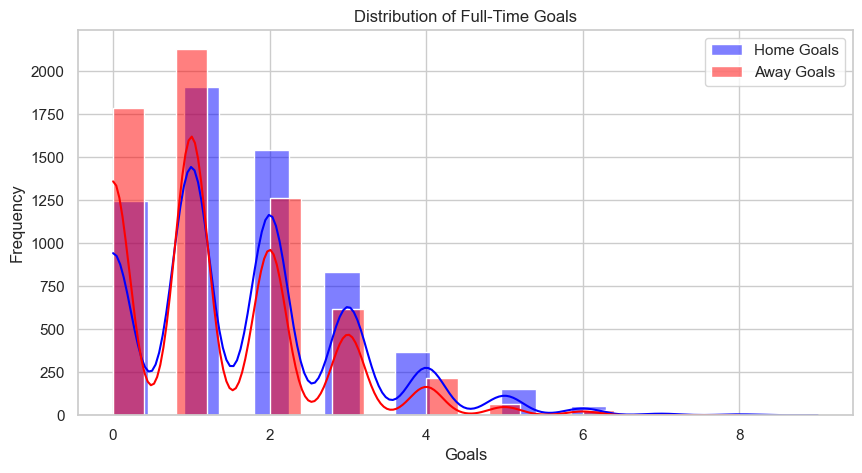

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of goals scored by home and away teams
plt.figure(figsize=(10, 5))
sns.histplot(bundesliga_df['FTHG'], bins=20, color='blue', label='Home Goals', kde=True)
sns.histplot(bundesliga_df['FTAG'], bins=20, color='red', label='Away Goals', kde=True)
plt.legend()
plt.title('Distribution of Full-Time Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()


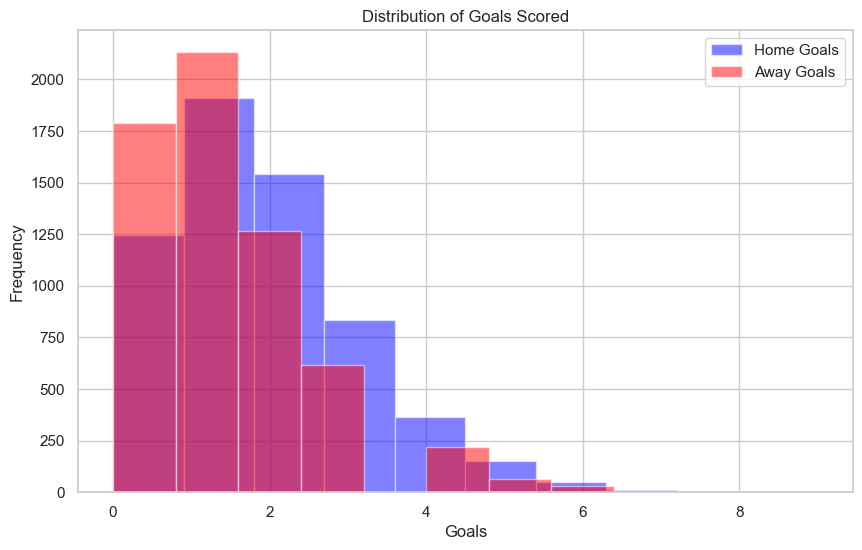

In [35]:
import matplotlib.pyplot as plt

# Plotting the distribution of goals scored
plt.figure(figsize=(10, 6))
plt.hist(bundesliga_df['FTHG'], bins=10, color='blue', alpha=0.5, label='Home Goals')
plt.hist(bundesliga_df['FTAG'], bins=10, color='red', alpha=0.5, label='Away Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Goals Scored')
plt.legend()
plt.show()

FTR
H    2764
A    1830
D    1522
Name: count, dtype: int64


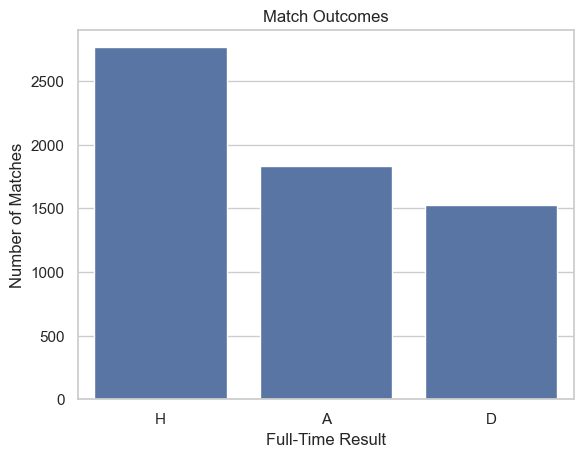

In [36]:
# Count of match outcomes
outcome_counts = bundesliga_df['FTR'].value_counts()
print(outcome_counts)

# Visualize outcome counts
sns.countplot(x='FTR', data=bundesliga_df)
plt.title('Match Outcomes')
plt.xlabel('Full-Time Result')
plt.ylabel('Number of Matches')
plt.show()


HomeTeam
Bayern Munich    1650
Dortmund         1346
Leverkusen       1243
Werder Bremen    1054
Wolfsburg        1022
M'gladbach        941
Stuttgart         912
Hoffenheim        877
Schalke 04        870
Ein Frankfurt     849
dtype: int64


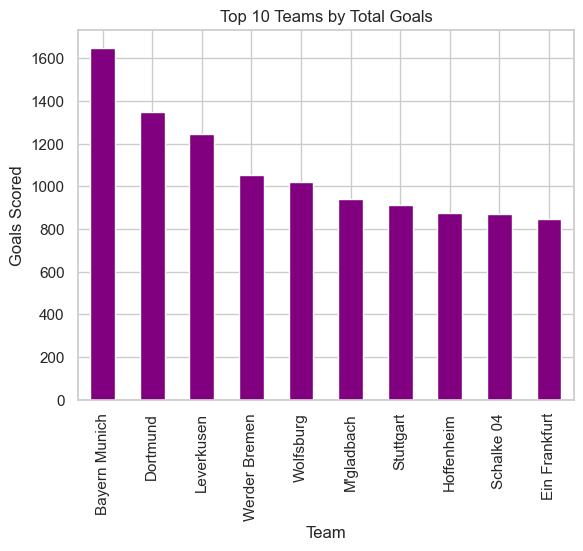

In [37]:
# Total goals scored by each team
home_goals = bundesliga_df.groupby('HomeTeam')['FTHG'].sum()
away_goals = bundesliga_df.groupby('AwayTeam')['FTAG'].sum()
total_goals = (home_goals + away_goals).sort_values(ascending=False).head(10)
print(total_goals)

# Bar plot of top 10 teams by goals
total_goals.plot(kind='bar', color='purple', title='Top 10 Teams by Total Goals')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.show()


In [38]:
#Created a new feature season 
bundesliga_df['Date'] = pd.to_datetime(bundesliga_df['Date'])
bundesliga_df['Season'] = bundesliga_df['Date'].dt.year.astype('int64')


/var/folders/23/pnlqvpn57396v6s8xyzh9vpr0000gn/T/ipykernel_90256/2638844518.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bundesliga_df['Date'] = pd.to_datetime(bundesliga_df['Date'])


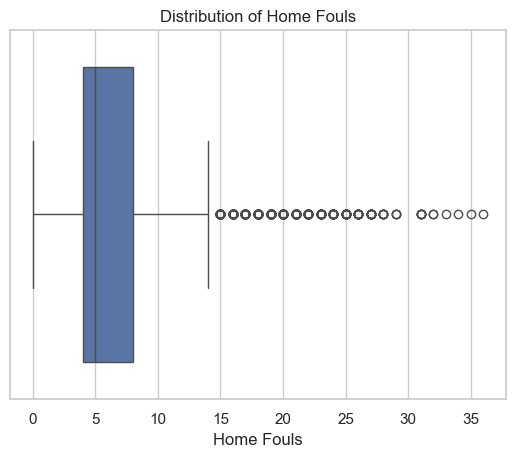

In [39]:
sns.boxplot(x='HF', data=bundesliga_df)
plt.xlabel('Home Fouls')
plt.title('Distribution of Home Fouls')
plt.show()

In [40]:
bundesliga_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,2004-06-08,Werder Bremen,Schalke 04,1,0,H,0,0,D,9,8,22,19,5,2,0,1,0,0,2004
1,2004-07-08,Dortmund,Wolfsburg,1,2,A,1,1,D,24,9,9,20,7,3,0,3,0,0,2004
2,2004-07-08,Freiburg,Hansa Rostock,0,0,D,0,0,D,13,7,16,24,5,5,1,2,0,0,2004
3,2004-07-08,Hamburg,Bayern Munich,0,2,A,0,1,A,13,12,18,24,5,3,3,1,0,0,2004
4,2004-07-08,Hertha,Bochum,2,2,D,2,0,H,21,12,18,14,2,1,1,2,0,0,2004


# Question 1: Which Teams Had the Best and Worst Goal Differences Between 2008 and 2018?

Team with Best Goal Difference: Bayern Munich (1037)
Team with Worst Goal Difference: FC Koln (-211)


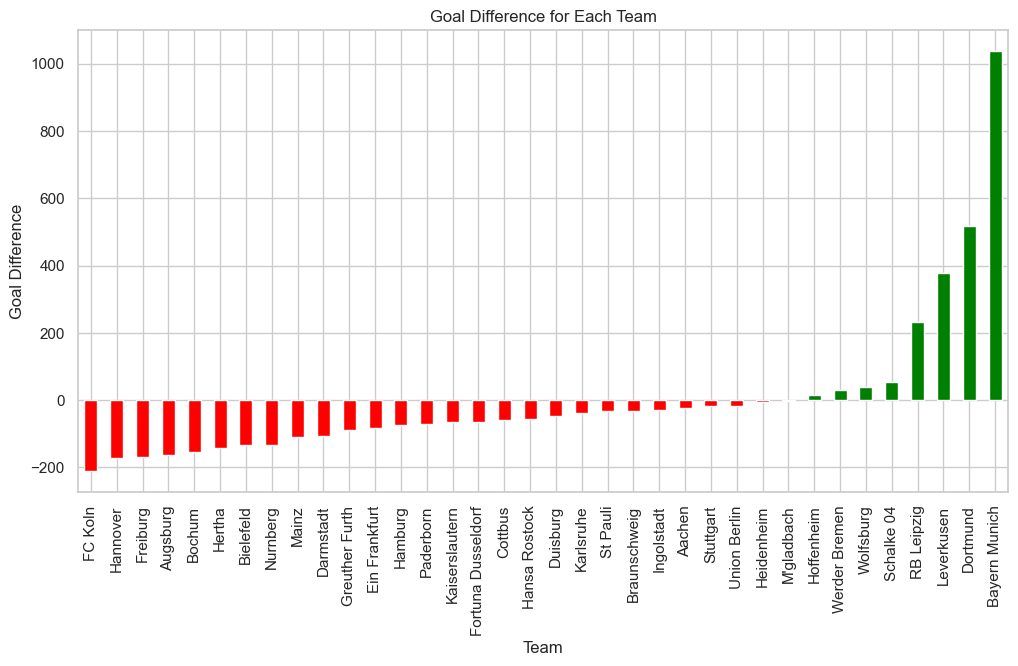

In [41]:
# Calculate total home and away goals scored and conceded by each team
home_goals_scored = bundesliga_df.groupby('HomeTeam')['FTHG'].sum()
away_goals_scored = bundesliga_df.groupby('AwayTeam')['FTAG'].sum()

home_goals_conceded = bundesliga_df.groupby('HomeTeam')['FTAG'].sum()
away_goals_conceded = bundesliga_df.groupby('AwayTeam')['FTHG'].sum()

# Calculate total goals scored and conceded
total_goals_scored = home_goals_scored + away_goals_scored
total_goals_conceded = home_goals_conceded + away_goals_conceded

# Calculate goal difference
goal_difference = total_goals_scored - total_goals_conceded

# Get teams with the best and worst goal differences
best_goal_diff_team = goal_difference.idxmax()
worst_goal_diff_team = goal_difference.idxmin()
print(f"Team with Best Goal Difference: {best_goal_diff_team} ({goal_difference[best_goal_diff_team]})")
print(f"Team with Worst Goal Difference: {worst_goal_diff_team} ({goal_difference[worst_goal_diff_team]})")

# Visualization
import matplotlib.pyplot as plt

# Sort goal differences for visualization
goal_difference_sorted = goal_difference.sort_values()

plt.figure(figsize=(12, 6))
goal_difference_sorted.plot(kind='bar', color=['green' if x > 0 else 'red' for x in goal_difference_sorted])
plt.title('Goal Difference for Each Team')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.show()


# Question 2: How Does Home Advantage Impact Match Outcomes in the Bundesliga?

In [42]:
# Count wins for home and away teams
home_wins = bundesliga_df[bundesliga_df['FTR'] == 'H'].shape[0]
away_wins = bundesliga_df[bundesliga_df['FTR'] == 'A'].shape[0]
draws = bundesliga_df[bundesliga_df['FTR'] == 'D'].shape[0]

# Calculate percentages
total_matches = bundesliga_df.shape[0]
home_win_percentage = (home_wins / total_matches) * 100
away_win_percentage = (away_wins / total_matches) * 100
draw_percentage = (draws / total_matches) * 100

print("Home Win Percentage:", home_win_percentage)
print("Away Win Percentage:", away_win_percentage)
print("Draw Percentage:", draw_percentage)

Home Win Percentage: 45.192936559843034
Away Win Percentage: 29.921517331589275
Draw Percentage: 24.88554610856769


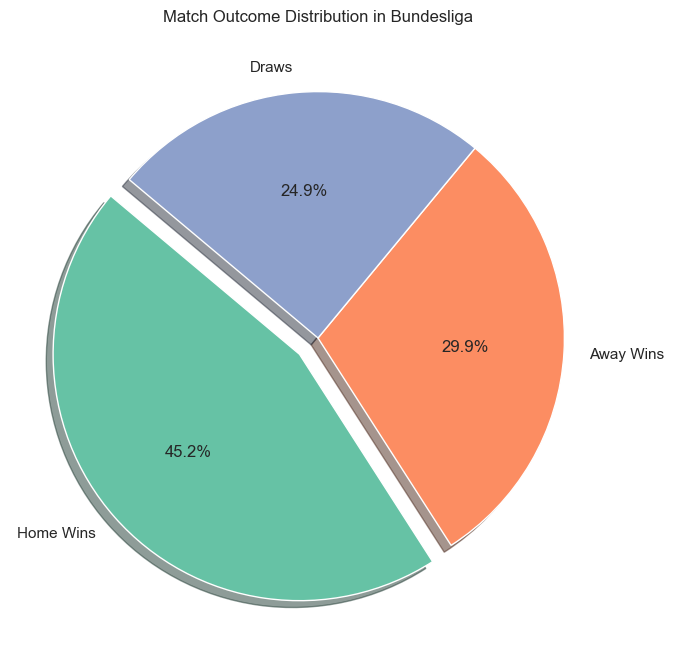

In [43]:

# Data for the pie chart
labels = ['Home Wins', 'Away Wins', 'Draws']
sizes = [home_win_percentage, away_win_percentage, draw_percentage]
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
explode = (0.1, 0, 0)  # explode the first slice for emphasis on home wins

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140
)
plt.title("Match Outcome Distribution in Bundesliga")
plt.show()

# Q3: Which season of the Bundesliga was the most competitive between 2004 and 2024?

In [44]:
# Filter data for seasons between 2004 and 2024
bundesliga_2004_2024 = bundesliga_df[(bundesliga_df['Season'] >= 2004) & (bundesliga_df['Season'] <= 2024)]

# Add a column for goal difference in each match
bundesliga_2004_2024['goal_difference'] = abs(bundesliga_2004_2024['FTHG'] - bundesliga_2004_2024['FTAG'])

# Calculate total draws per season
draws_per_season = bundesliga_2004_2024[bundesliga_2004_2024['FTR'] == 'D'].groupby('Season').size().reset_index(name='total_draws')

# Calculate average goal difference per season
goal_diff_per_season = bundesliga_2004_2024.groupby('Season')['goal_difference'].mean().reset_index(name='avg_goal_difference')

# Combine the two metrics into a single dataframe
competitiveness = draws_per_season.merge(goal_diff_per_season, on='Season')

# Find the season with the highest competitiveness, defined by highest draws and lowest average goal difference
most_competitive_season = competitiveness.sort_values(by=['total_draws', 'avg_goal_difference'], ascending=[False, True]).head(1)

print("Most Competitive Season (2004-2024):")
print(most_competitive_season)

Most Competitive Season (2004-2024):
   Season  total_draws  avg_goal_difference
2    2006           99             1.183007


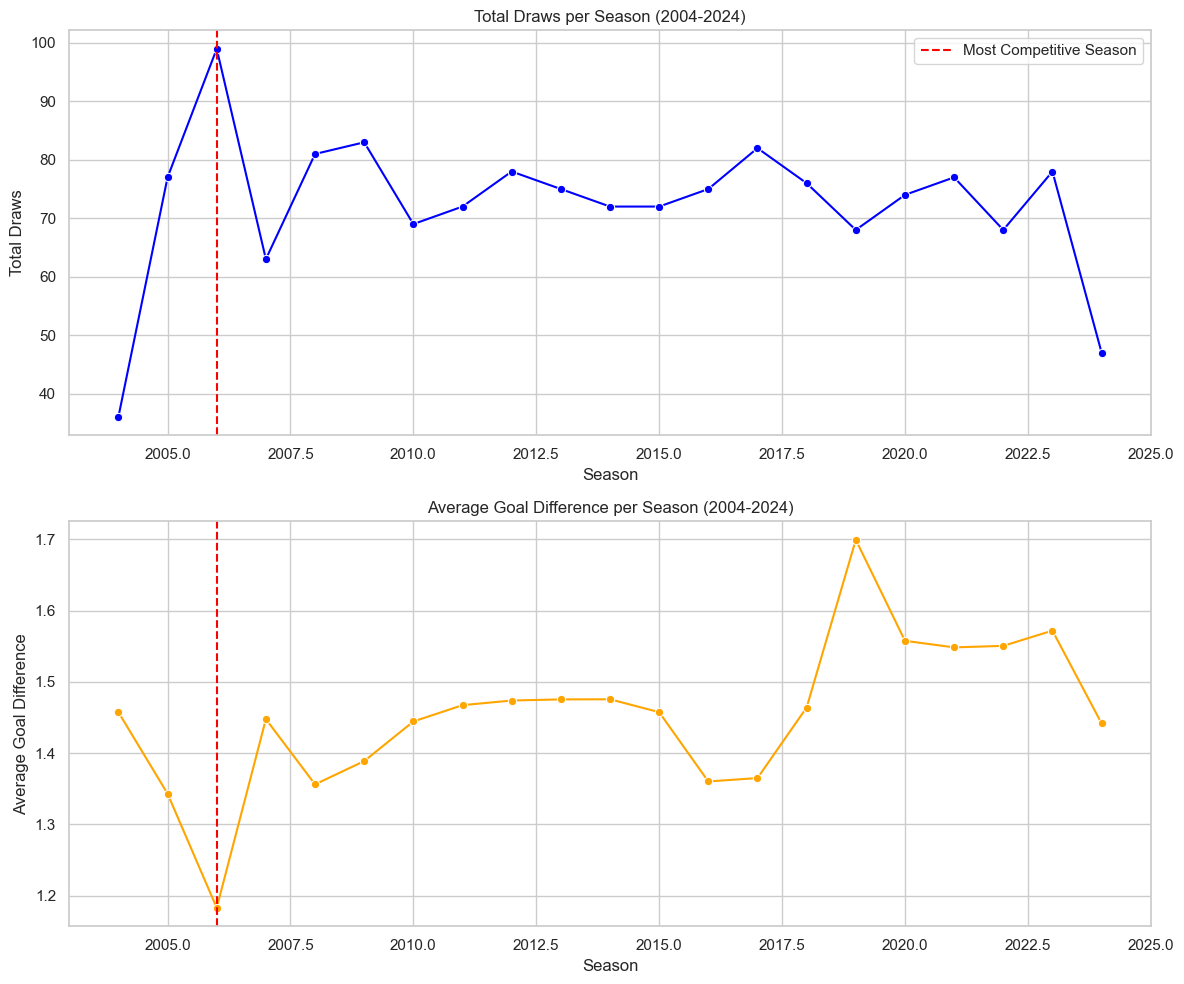

In [45]:
import seaborn as sns

# Visualization imports
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a figure with two subplots for Total Draws and Average Goal Difference
fig, ax1 = plt.subplots(2, 1, figsize=(12, 10))

# 1. Plot total draws per season
sns.lineplot(
    data=competitiveness,
    x='Season',
    y='total_draws',
    marker='o',
    color='blue',
    ax=ax1[0]
)
ax1[0].set_title("Total Draws per Season (2004-2024)")
ax1[0].set_xlabel("Season")
ax1[0].set_ylabel("Total Draws")

# 2. Plot average goal difference per season
sns.lineplot(
    data=competitiveness,
    x='Season',
    y='avg_goal_difference',
    marker='o',
    color='orange',
    ax=ax1[1]
)
ax1[1].set_title("Average Goal Difference per Season (2004-2024)")
ax1[1].set_xlabel("Season")
ax1[1].set_ylabel("Average Goal Difference")

# Highlighting the most competitive season
most_comp_season = most_competitive_season['Season'].values[0]
ax1[0].axvline(most_comp_season, color='red', linestyle='--', label="Most Competitive Season")
ax1[1].axvline(most_comp_season, color='red', linestyle='--')

# Add legend to the top plot
ax1[0].legend()

# Adjust layout
plt.tight_layout()
plt.show()


# Q4: What is the best month to watch Bundesliga matches, based on average goals scored and match intensity?

In [46]:


# Convert 'Date' to datetime format if it's not already
bundesliga_df['Date'] = pd.to_datetime(bundesliga_df['Date'], errors='coerce')

# Extract the month from the 'Date' column
bundesliga_df['Month'] = bundesliga_df['Date'].dt.month

# Calculate total goals per match and add to the dataframe
bundesliga_df['total_goals'] = bundesliga_df['FTHG'] + bundesliga_df['FTAG']

# Calculate monthly averages for goals and fouls (shots on target not present)
monthly_goals = bundesliga_df.groupby('Month')['total_goals'].mean().reset_index(name='avg_goals')
monthly_fouls = bundesliga_df.groupby('Month')[['HF', 'AF']].mean().sum(axis=1).reset_index(name='avg_fouls')

# Merge the metrics into a single DataFrame
monthly_stats = monthly_goals.merge(monthly_fouls, on='Month')

# Sort by highest average goals and fouls to identify high-intensity months
best_month = monthly_stats.sort_values(by=['avg_goals', 'avg_fouls'], ascending=[False, False])

# Display the best month to watch
print("Best Month to Watch Bundesliga:")
print(best_month.head(1))  # Display the top month



Best Month to Watch Bundesliga:
   Month  avg_goals  avg_fouls
4      5   3.259091  13.779545


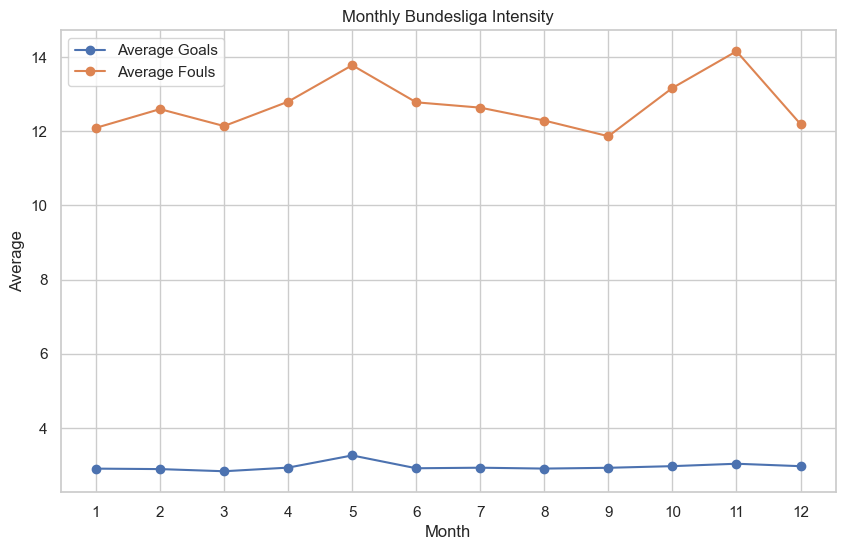

In [47]:
plt.figure(figsize=(10, 6))

# Plot average goals per month
plt.plot(monthly_stats['Month'], monthly_stats['avg_goals'], marker='o', label='Average Goals')

# Plot average fouls per month
plt.plot(monthly_stats['Month'], monthly_stats['avg_fouls'], marker='o', label='Average Fouls')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Average')
plt.title('Monthly Bundesliga Intensity')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)

plt.show()


# Q5: Which Teams Show the Most Consistent Performance Over the Years?

In [48]:
# Calculate points for home and away based on match result
bundesliga_df['home_points'] = bundesliga_df['FTR'].apply(lambda x: 3 if x == 'H' else (1 if x == 'D' else 0))
bundesliga_df['away_points'] = bundesliga_df['FTR'].apply(lambda x: 3 if x == 'A' else (1 if x == 'D' else 0))

# Aggregate points for each team per season
home_points = bundesliga_df.groupby(['Season', 'HomeTeam'])['home_points'].sum().reset_index().rename(columns={'HomeTeam': 'Team', 'home_points': 'points'})
away_points = bundesliga_df.groupby(['Season', 'AwayTeam'])['away_points'].sum().reset_index().rename(columns={'AwayTeam': 'Team', 'away_points': 'points'})

# Combine home and away points for each team per season
team_season_points = pd.concat([home_points, away_points]).groupby(['Season', 'Team'])['points'].sum().reset_index()

# Calculate the standard deviation of points for each team across seasons
team_consistency = team_season_points.groupby('Team')['points'].std().reset_index(name='points_std_dev')

# Sort teams by consistency (lower standard deviation means higher consistency)
most_consistent_teams = team_consistency.sort_values(by='points_std_dev').head(10)

print("Teams with the Most Consistent Performance Over the Years:")
print(most_consistent_teams)





Teams with the Most Consistent Performance Over the Years:
              Team  points_std_dev
18      Heidenheim        1.414214
9         Duisburg        1.825742
5     Braunschweig        2.121320
0           Aachen        2.828427
31        St Pauli        3.535534
14  Greuther Furth        3.593976
17   Hansa Rostock        3.651484
28       Paderborn        4.573474
21      Ingolstadt        6.928203
23       Karlsruhe        6.928203


/var/folders/23/pnlqvpn57396v6s8xyzh9vpr0000gn/T/ipykernel_90256/900638353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='points_std_dev', y='Team', data=most_consistent_teams, palette='viridis')


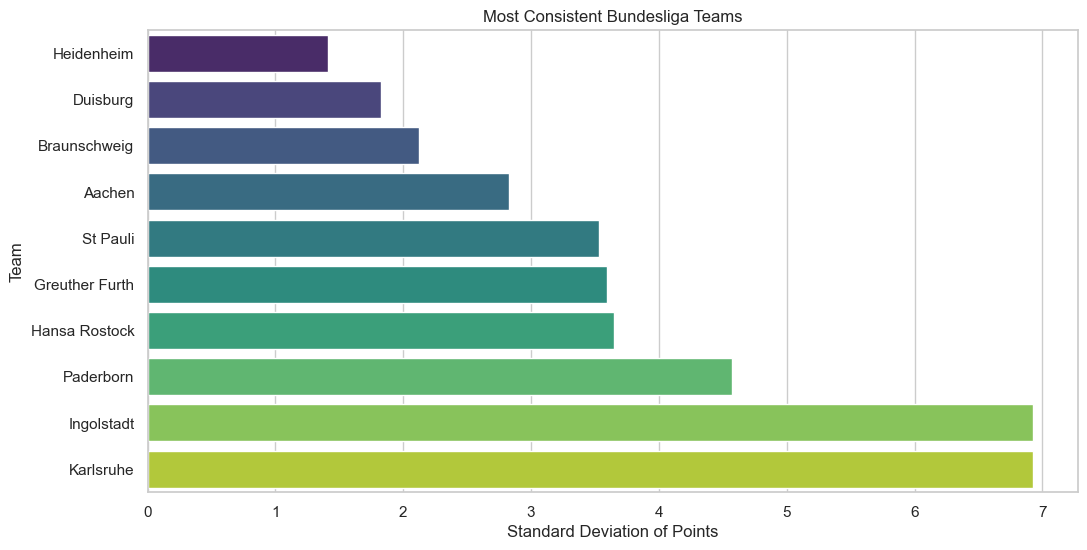

In [49]:
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x='points_std_dev', y='Team', data=most_consistent_teams, palette='viridis')

# Customize the plot
plt.title('Most Consistent Bundesliga Teams')
plt.xlabel('Standard Deviation of Points')
plt.ylabel('Team')

# Show the plot
plt.show()

In [53]:
# Hypothesis 1: Red Cards Impact on Match Outcomes

bundesliga_df['CloseMatch'] = abs(bundesliga_df['FTHG'] - bundesliga_df['FTAG']) <= 1
red_card_loss = bundesliga_df[((bundesliga_df['HR'] > 0) | (bundesliga_df['AR'] > 0)) & bundesliga_df['CloseMatch']]
outcomes = red_card_loss['FTR'].value_counts(normalize=True)
print("Red Card Impact on Outcomes in Close Matches:\n", outcomes)

Red Card Impact on Outcomes in Close Matches:
 FTR
D    0.423280
H    0.326797
A    0.249922
Name: proportion, dtype: float64


Plotting Red Card Impact...


/var/folders/23/pnlqvpn57396v6s8xyzh9vpr0000gn/T/ipykernel_90256/3522212619.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcomes.index, y=outcomes.values, palette="coolwarm")


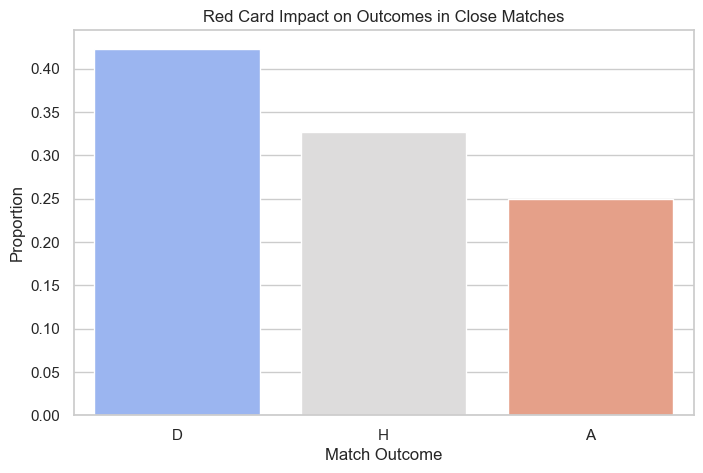

Plotting Draw Probabilities...


/var/folders/23/pnlqvpn57396v6s8xyzh9vpr0000gn/T/ipykernel_90256/3522212619.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=draw_prob.index, y=draw_prob.values, palette="viridis")


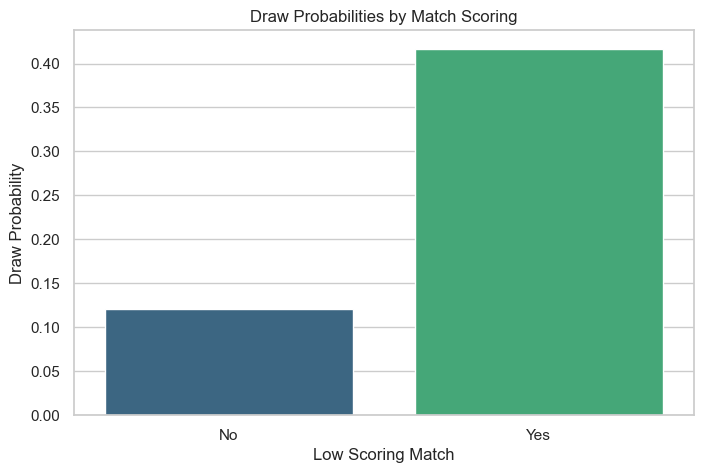

Plotting Home Advantage...


/var/folders/23/pnlqvpn57396v6s8xyzh9vpr0000gn/T/ipykernel_90256/3522212619.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Home', 'Away'], y=avg_goals.values, palette="magma")


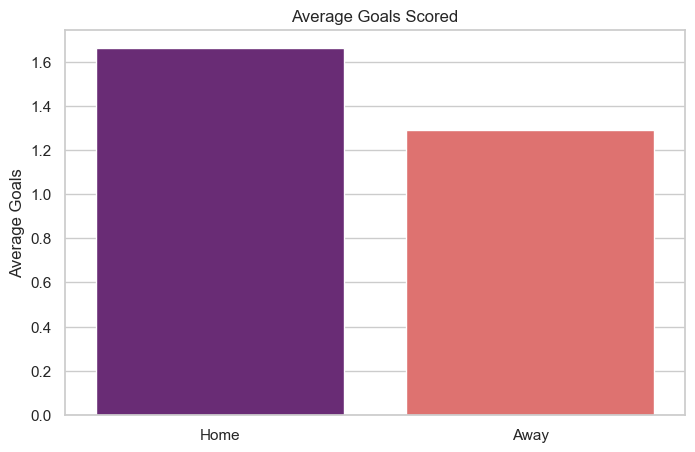

Plotting Fouls vs. Yellow Cards...


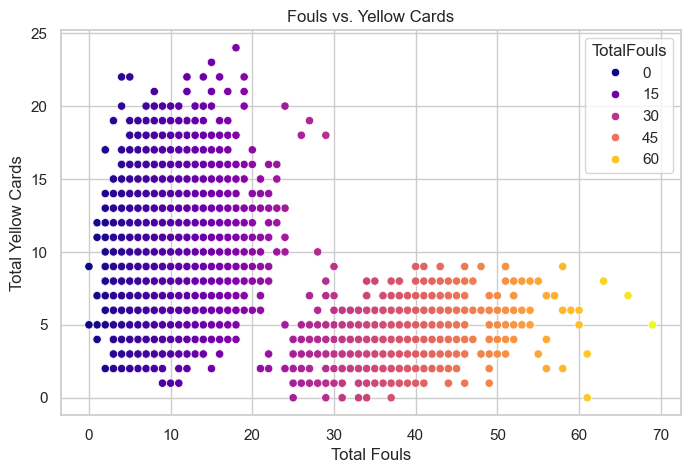

Plotting Seasonal Draw Rates...


/var/folders/23/pnlqvpn57396v6s8xyzh9vpr0000gn/T/ipykernel_90256/3522212619.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_draws.index, y=seasonal_draws.values, palette="cubehelix")


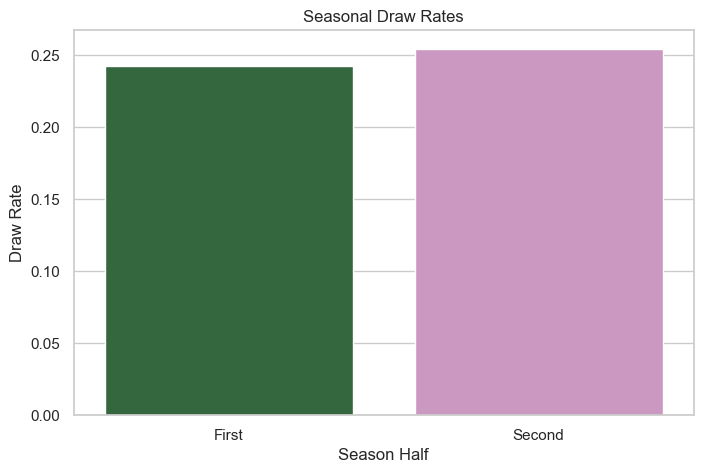

Plotting Defensive Consistency...


/var/folders/23/pnlqvpn57396v6s8xyzh9vpr0000gn/T/ipykernel_90256/3522212619.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consistency.head(10).index, y=consistency.head(10).values, palette="rocket")


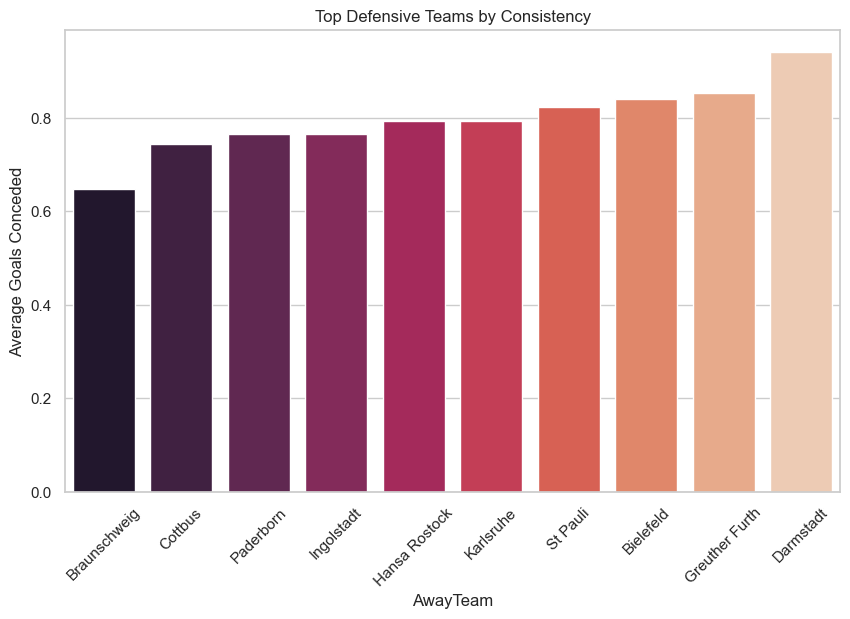

Attendance data not available. Skipping Attendance Analysis.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style for aesthetic visuals
sns.set(style="whitegrid")

# Load your Bundesliga data
# bundesliga_df = pd.read_csv("your_dataset.csv")  # Uncomment and load your dataset

# 1. Impact of Red Cards on Match Outcomes
print("Plotting Red Card Impact...")
bundesliga_df['CloseMatch'] = abs(bundesliga_df['FTHG'] - bundesliga_df['FTAG']) <= 1
red_card_loss = bundesliga_df[((bundesliga_df['HR'] > 0) | (bundesliga_df['AR'] > 0)) & bundesliga_df['CloseMatch']]
if not red_card_loss.empty:
    outcomes = red_card_loss['FTR'].value_counts(normalize=True)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=outcomes.index, y=outcomes.values, palette="coolwarm")
    plt.title("Red Card Impact on Outcomes in Close Matches")
    plt.xlabel("Match Outcome")
    plt.ylabel("Proportion")
    plt.show()

# 2. Low-Scoring Matches and Draw Probabilities
print("Plotting Draw Probabilities...")
bundesliga_df['LowScoring'] = (bundesliga_df['FTHG'] + bundesliga_df['FTAG']) < 3
draw_prob = bundesliga_df.groupby('LowScoring')['FTR'].apply(lambda x: (x == 'D').mean())
plt.figure(figsize=(8, 5))
sns.barplot(x=draw_prob.index, y=draw_prob.values, palette="viridis")
plt.title("Draw Probabilities by Match Scoring")
plt.xlabel("Low Scoring Match")
plt.ylabel("Draw Probability")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 3. Home Advantage and Goal Scoring
print("Plotting Home Advantage...")
avg_goals = bundesliga_df[['FTHG', 'FTAG']].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=['Home', 'Away'], y=avg_goals.values, palette="magma")
plt.title("Average Goals Scored")
plt.ylabel("Average Goals")
plt.show()

# 4. Yellow Cards and Match Physicality
print("Plotting Fouls vs. Yellow Cards...")
bundesliga_df['TotalFouls'] = bundesliga_df['HF'] + bundesliga_df['AF']
bundesliga_df['TotalYellows'] = bundesliga_df['HY'] + bundesliga_df['AY']
plt.figure(figsize=(8, 5))
sns.scatterplot(x=bundesliga_df['TotalFouls'], y=bundesliga_df['TotalYellows'], hue=bundesliga_df['TotalFouls'], palette="plasma")
plt.title("Fouls vs. Yellow Cards")
plt.xlabel("Total Fouls")
plt.ylabel("Total Yellow Cards")
plt.show()

# 5. Seasonal Impact on Draws
print("Plotting Seasonal Draw Rates...")
bundesliga_df['SeasonHalf'] = bundesliga_df['Date'].astype(str).apply(lambda x: 'First' if int(x.split('-')[1]) <= 6 else 'Second')
seasonal_draws = bundesliga_df.groupby('SeasonHalf')['FTR'].apply(lambda x: (x == 'D').mean())
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_draws.index, y=seasonal_draws.values, palette="cubehelix")
plt.title("Seasonal Draw Rates")
plt.xlabel("Season Half")
plt.ylabel("Draw Rate")
plt.show()

# 6. Consistency of Defensive Teams
print("Plotting Defensive Consistency...")
bundesliga_df['Conceded'] = bundesliga_df['FTAG']
consistency = bundesliga_df.groupby('AwayTeam')['Conceded'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=consistency.head(10).index, y=consistency.head(10).values, palette="rocket")
plt.title("Top Defensive Teams by Consistency")
plt.ylabel("Average Goals Conceded")
plt.xticks(rotation=45)
plt.show()

# 7. Match Attendance and Home Performance (if data available)
if 'Attendance' in bundesliga_df.columns:
    print("Plotting Attendance Impact...")
    attendance_corr = bundesliga_df[['Attendance', 'FTHG']].corr().iloc[0, 1]
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=bundesliga_df['Attendance'], y=bundesliga_df['FTHG'], hue=bundesliga_df['FTHG'], palette="cool")
    plt.title("Attendance vs. Home Performance")
    plt.xlabel("Attendance")
    plt.ylabel("Home Goals")
    plt.show()
else:
    print("Attendance data not available. Skipping Attendance Analysis.")